# ANALIZA IN VIZUALIZACIJA FINANČNIH PODATKOV O DELNICAH 

Avtor: Marcel Blagotinšek
## UVOD
V tej nalogi je moj namen v prvem delu pridobiti podatke o delnicah petih velikih ameriških podjetji, te podatke nato obdelati/dodelati za namene analize in vizualizacije, ter na koncu shraniti. V drugem delu sledi analiza in vizualizacija podatkov. Na začetku si pogledam gibanje cen delnic skozi opazovano obdobje, izpostavim morebitne podobnosti/odstopanja, jih prikažem vizualno, nato pa prikažem še gibanje volumna ter vrednosti podjetji. Nato se lotim analiziranja volatilnosti in pa trendov delnic, ki vsekakor igrajo veliko vlogo pri investitorjevih odločitvah. Z manipulacijo podatkov predstavim porazdelitev dnevnih donosov in na grafu prikažem trende gibanja cen delnic. V zadnjem razdelku prikažem "simulacijo" dveh različnih strategij investiranja za katere bi se lahko nek investitor odločil in ju med seboj primerjam.

## UVOZ IN OBDELAVA PODATKOV

### PRIPRAVE NA ZAČETKU

Uvozim nekatere knjižnice, ki jih bom potreboval.

In [61]:
import pandas as pd
import numpy as np
import yfinance as yf


Delnice bom opazoval v obdobju petih let in sicer **od** 1. 7. 2018 **do** 1. 7. 2023.

In [62]:
z = "2018-07-01"
k = "2023-07-01"

Kot zgoraj rečeno me bojo zanimalne delnice petih velikih ameriških podjetij, in sicer delnice **Apple Inc.** (AAPL), **Alphabet Inc.** (GOOGL), **Amazon.com Inc.** (AMZN), **Microsoft Corporation** (MSFT) in **Meta Platforms Inc.** (META).

In [63]:
imena_delnic = ['MSFT', 'AMZN', 'GOOGL', 'AAPL', 'META']

### UVOZ

Uvozim funkcijo s katero nato pridobim podatke o delnicah, ki jih shranim v slovar tabel. Knjižnica "yfinance" uporablja specifičen format tabel, kjer je stolpec "Date" (datum) zamaknjen za eno vrstico nižje od ostalih. 

In [64]:
from pridobitev_podatkov import pridobi_podatke
podatki_o_delnicah = pridobi_podatke(imena_delnic, z, k)
podatki_o_delnicah["AAPL"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,45.955002,46.825001,45.855000,46.794998,44.720829,70925200
2018-07-03,46.947498,46.987499,45.884998,45.980000,43.941948,55819200
2018-07-05,46.314999,46.602501,46.070000,46.349998,44.295547,66416800
2018-07-06,46.355000,47.107498,46.299999,46.992500,44.909576,69940800
2018-07-09,47.375000,47.669998,47.325001,47.645000,45.533150,79026400
...,...,...,...,...,...,...
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800


V primeru, da je katera od tabel, ki smo jih pridobili s prejšno funkcijo pomankljiva, mankajoče vrednosti dopolnimo z metodo "ffill" iz knjižnice pandas. Znotraj funkcije dopolni() zaokrožim vse podatke na 3 decimalna mesta, saj je za namene načrtovane analize to dovolj. V prihodnje vse razultate izračunov zaokrožujem na dve decimalni mesti.

In [65]:
from ureditev import dopolni
podatki_o_delnicah = dopolni(podatki_o_delnicah)

### DODAJANJE STOLPCEV

Za namene analize ter vizualizacije podatkov, ki bo sledila, bom imena stolpcev prevedel v slovenščino ("Open" -> "Odpiralni", "Close" -> "Zapiralni", "High" -> "Najvišji", "Low" -> "Najnižji", "Close" -> "Zapiralni", "Adj Close" -> "Prilagojen zaključni" in "Volume" -> "Volumen"), vsaki tabeli dodal stolpec "Dnevni_razpon" v kateremu se bo za vsak trgovalni dan nahajala informacija, ki nam bo povedala razpon med minimalno in maksimalno ceno delnice za tisti dan, dodal stolpec "Dnevni_donos", ki bo vseboval podatke o dnevnem donosu delnice izraženem v odstotkih in dodal bom še stolpec "Vrednost_izmenjanega" v katerem se bo nahajal podatek o vrednosti izmenjanih delnic na dnevni bazi izraženih v ameriških dolarjih. 

Prevedem imena stolpcev.

In [66]:
from ureditev import prevedi
podatki_o_delnicah = prevedi(podatki_o_delnicah)
podatki_o_delnicah["AAPL"]


,Odpiralni,Najvišji,Najnižji,Zapiralni,Prilagojen_zaključni,Volumen
Date,,,,,,
2018-07-02,45.955,46.825,45.855,46.795,44.721,70925200
2018-07-03,46.947,46.987,45.885,45.980,43.942,55819200
2018-07-05,46.315,46.603,46.070,46.350,44.296,66416800
2018-07-06,46.355,47.107,46.300,46.993,44.910,69940800
2018-07-09,47.375,47.670,47.325,47.645,45.533,79026400
...,...,...,...,...,...,...
2023-06-26,186.830,188.050,185.230,185.270,185.270,48088700
2023-06-27,185.890,188.390,185.670,188.060,188.060,50730800
2023-06-28,187.930,189.900,187.600,189.250,189.250,51216800


Vsaki tabeli dodam stolpec "Dnevni_donos". V tem stolpcu se bo nahajal podatek o prirastku oz. padcu cene delnice glede na prejšni trgovalni dan izražen v odstotkih, pri čemer upoštevamo zapiralne tečaje. Ta stolpec bo prišel prav v nadaljevanju, kjer bomo primerjali porazdelitev dnevnih donosov za vseh 5 delnic. Dnevne donose lahko izračunamo z uporabo funkcije pct_change() iz knjižnice "pandas", lahko pa tudi z preprosto formulo, v kateri od kvocienta cene na današnji trgovalni dan in prejšni trgovalni dan odštejemo 1. Stolpec "Dnevni_donos" bo za prvi trgovalni dan vseboval vrednost NaN, za vse naslednje dni pa izračunane donose.

In [67]:
from ureditev import dodaj_dnevni_donos
podatki_o_delnicah = dodaj_dnevni_donos(podatki_o_delnicah)
podatki_o_delnicah["AAPL"]


,Odpiralni,Najvišji,Najnižji,Zapiralni,Prilagojen_zaključni,Volumen,Dnevni_donos
Date,,,,,,,
2018-07-02,45.955,46.825,45.855,46.795,44.721,70925200,NaN
2018-07-03,46.947,46.987,45.885,45.980,43.942,55819200,-1.741639
2018-07-05,46.315,46.603,46.070,46.350,44.296,66416800,0.804698
2018-07-06,46.355,47.107,46.300,46.993,44.910,69940800,1.387271
2018-07-09,47.375,47.670,47.325,47.645,45.533,79026400,1.387441
...,...,...,...,...,...,...,...
2023-06-26,186.830,188.050,185.230,185.270,185.270,48088700,-0.755303
2023-06-27,185.890,188.390,185.670,188.060,188.060,50730800,1.505910
2023-06-28,187.930,189.900,187.600,189.250,189.250,51216800,0.632777


Vsaki tabeli dodam stolpec "Dnevni_razpon", ki nam pove interval na katerem se je v določenem trgovalnem dnevu gibala cena opazovane delnice.

In [68]:
from ureditev import dodaj_dnevni_razpon
podatki_o_delnicah = dodaj_dnevni_razpon(podatki_o_delnicah)
podatki_o_delnicah["AAPL"]


,Odpiralni,Najvišji,Najnižji,Zapiralni,Prilagojen_zaključni,Volumen,Dnevni_donos,Dnevni_razpon
Date,,,,,,,,
2018-07-02,45.955,46.825,45.855,46.795,44.721,70925200,NaN,45.855 - 46.825
2018-07-03,46.947,46.987,45.885,45.980,43.942,55819200,-1.741639,45.885 - 46.987
2018-07-05,46.315,46.603,46.070,46.350,44.296,66416800,0.804698,46.07 - 46.603
2018-07-06,46.355,47.107,46.300,46.993,44.910,69940800,1.387271,46.3 - 47.107
2018-07-09,47.375,47.670,47.325,47.645,45.533,79026400,1.387441,47.325 - 47.67
...,...,...,...,...,...,...,...,...
2023-06-26,186.830,188.050,185.230,185.270,185.270,48088700,-0.755303,185.23 - 188.05
2023-06-27,185.890,188.390,185.670,188.060,188.060,50730800,1.505910,185.67 - 188.39
2023-06-28,187.930,189.900,187.600,189.250,189.250,51216800,0.632777,187.6 - 189.9


Vsaki tabeli dodam stolpec "Povprečni". Ta nam koristi za nadaljni izračun vrednosti izmenjanih delnic v trgovalnem dnevu.

In [69]:
from ureditev import povprecje
podatki_o_delnicah = povprecje(podatki_o_delnicah)
podatki_o_delnicah["AAPL"]


,Odpiralni,Najvišji,Najnižji,Zapiralni,Prilagojen_zaključni,Volumen,Dnevni_donos,Dnevni_razpon,Povprečni
Date,,,,,,,,,
2018-07-02,45.955,46.825,45.855,46.795,44.721,70925200,NaN,45.855 - 46.825,46.340
2018-07-03,46.947,46.987,45.885,45.980,43.942,55819200,-1.741639,45.885 - 46.987,46.436
2018-07-05,46.315,46.603,46.070,46.350,44.296,66416800,0.804698,46.07 - 46.603,46.336
2018-07-06,46.355,47.107,46.300,46.993,44.910,69940800,1.387271,46.3 - 47.107,46.704
2018-07-09,47.375,47.670,47.325,47.645,45.533,79026400,1.387441,47.325 - 47.67,47.498
...,...,...,...,...,...,...,...,...,...
2023-06-26,186.830,188.050,185.230,185.270,185.270,48088700,-0.755303,185.23 - 188.05,186.640
2023-06-27,185.890,188.390,185.670,188.060,188.060,50730800,1.505910,185.67 - 188.39,187.030
2023-06-28,187.930,189.900,187.600,189.250,189.250,51216800,0.632777,187.6 - 189.9,188.750


Vsaki tabeli dodam stolpec "Vrednost_izmenjanega". Tukaj bom uporabil volumen oz. količino izmenjanih delnic v trgovalnem dnevu in jih pomnožil s povprečno vrednostjo delnice v tistem dnevu. Lahko bi uporabil tudi odpiralni/zapiralni tečaj. Enota količin v stolpcu "Vrednost_izmenjanega" ostaja ameriški dolar. 

In [70]:
from ureditev import vrednost_izmenjanega
podatki_o_delnicah = vrednost_izmenjanega(podatki_o_delnicah)
podatki_o_delnicah["AAPL"]


,Odpiralni,Najvišji,Najnižji,Zapiralni,Prilagojen_zaključni,Volumen,Dnevni_donos,Dnevni_razpon,Povprečni,Vrednost_izmenjanega
Date,,,,,,,,,,
2018-07-02,45.955,46.825,45.855,46.795,44.721,70925200,NaN,45.855 - 46.825,46.340,3.286674e+09
2018-07-03,46.947,46.987,45.885,45.980,43.942,55819200,-1.741639,45.885 - 46.987,46.436,2.592020e+09
2018-07-05,46.315,46.603,46.070,46.350,44.296,66416800,0.804698,46.07 - 46.603,46.336,3.077489e+09
2018-07-06,46.355,47.107,46.300,46.993,44.910,69940800,1.387271,46.3 - 47.107,46.704,3.266515e+09
2018-07-09,47.375,47.670,47.325,47.645,45.533,79026400,1.387441,47.325 - 47.67,47.498,3.753596e+09
...,...,...,...,...,...,...,...,...,...,...
2023-06-26,186.830,188.050,185.230,185.270,185.270,48088700,-0.755303,185.23 - 188.05,186.640,8.975275e+09
2023-06-27,185.890,188.390,185.670,188.060,188.060,50730800,1.505910,185.67 - 188.39,187.030,9.488182e+09
2023-06-28,187.930,189.900,187.600,189.250,189.250,51216800,0.632777,187.6 - 189.9,188.750,9.667171e+09


### SHRANJEVANJE

Shranim dopolnjene tabele v datoteke tipa CSV in poimenujem tabele.

In [71]:
from ureditev import shrani_podatke
shrani_podatke(podatki_o_delnicah)
microsoft = pd.read_csv("data\MSFT.csv")
amazon = pd.read_csv("data\AMZN.csv")
google = pd.read_csv("data\GOOGL.csv")
apple = pd.read_csv("data\AAPL.csv")
meta = pd.read_csv("data\META.csv")


## ANALIZA IN VIZUALIZACIJA PODATKOV                                                                                                                                 

### GIBANJE CEN
Za izbranih 5 večjih podjetij nas zanima gibanje cen delnic na izbranem intervalu. Gibanja cen lahko dobro prikažemo tako, da izberemo cene ob zaprtju ali ob odprtju borze. Prvo to storimo za cene ob zaprtju borze. Uporabimo funkcijo, ki sprejme kot prvi argument slovar tabel ter kot drugi argument ime stolpca iz katerega podatke želimo uporabiti pri risanju.

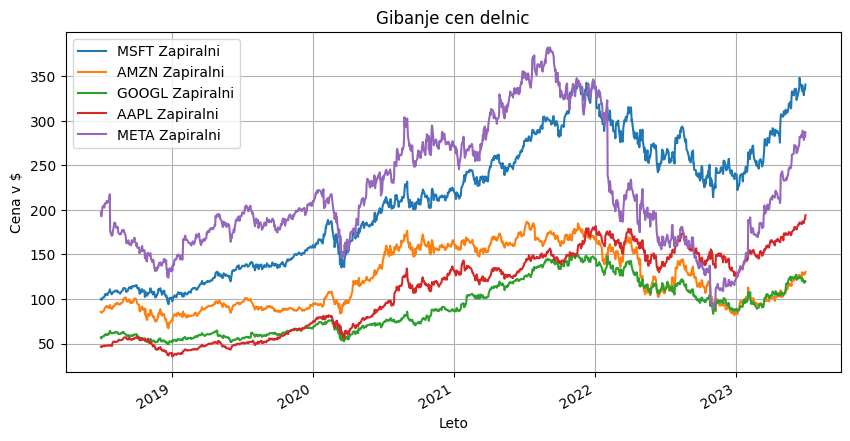

In [72]:
from analiza import graf_cene
graf_cene(podatki_o_delnicah, "Zapiralni")

Še za cene ob odprtju borze.

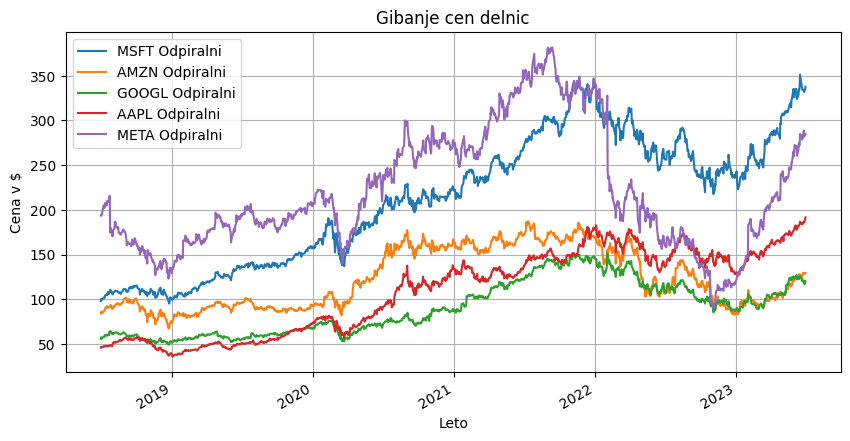

In [73]:
from analiza import graf_cene
graf_cene(podatki_o_delnicah, "Odpiralni")

Prikazali smo gibanje cen delnic pri čemer smo enkrat uporabili odpiralne tečaje, drugič pa zapiralne tečaje. Vidimo, da sta na pogled grafa identična, saj se tako majhnih dnenvnih razponov cen na grafu, ki prikazuje podatke za preteklih 5 let, ne opazi. Za najbolšo predstavo in nadaljno analizo pa bomo kot cene delnic na posamezen dan uporabili prilagojene zaključne tečaje (stolpec "Adj Close"), pri katerih so upoštevani kapitalski donosi v obliki dividend in kakršnekoli druge spremembe vezane na poslovanje podjetja. Spodnji graf prikazuje gibanje cen delnic, kjer upoštevamo prilagojene zaključne tečaje.

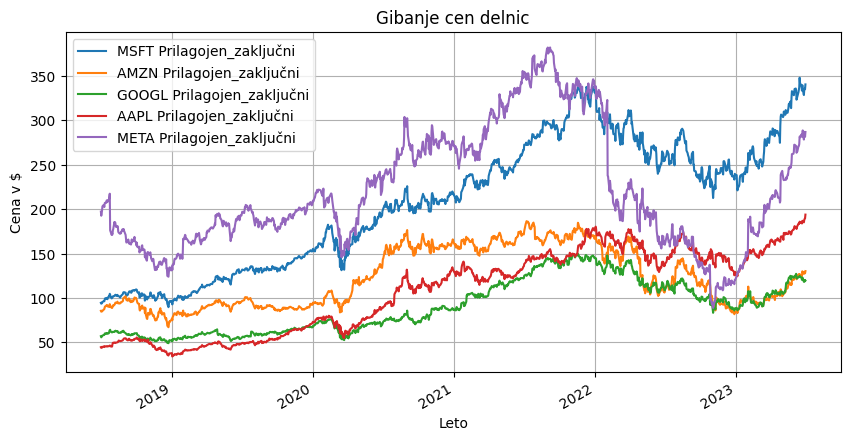

In [74]:
from analiza import graf_cene
graf_cene(podatki_o_delnicah, "Prilagojen_zaključni")

Zdi se nam, da čeprav so cene delnic po vrednosti vseskozi različne, sledijo podobnemu trendu, o tem se kasneje prepričam z aproksimativnimi grafi, ki "oblažijo" konstantno nihanje cen delnic, ki nekoliko otežujejo prepoznavanje trenda. Izstopa samo delnica podjetja Meta Inc. oz. prej imenovano Facebook Inc. Bolj strme padce in vzpone kot pri ostalih podjetjih lahko zasledimo kmalu po vstopu v leto 2020. Razlog v tem tiči v valu pandemije Covid-19. Takrat so padce cen doživele prav vse opazovane delnice. Največje odstopanje od trenda ostalih delnic pa vidimo takoj po vstopu v leto 2022. Ta del grafa sem označil. V razdelku "TRENDI IN VOLATILNOST DELNIC" se prepričamo, da je delnica podjetja Meta Inc. res odstopajoča po trendu ter najbolj volatilna.

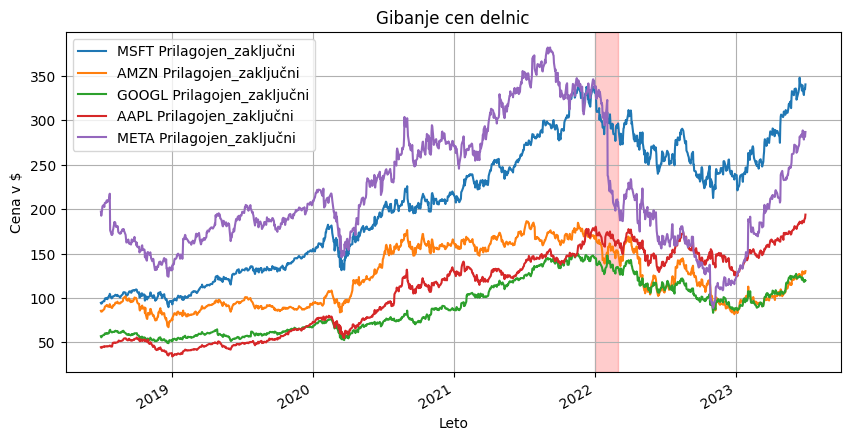

In [75]:
from analiza import padec_meta
padec_meta(podatki_o_delnicah, "Prilagojen_zaključni")

V zgornjih grafih smo delnice med seboj primerjali cenovno. To nam razen tega, katera delnica je dražja/cenejša, ne pove kaj več. Recimo, da nas zanima priljubljenost delnic v očeh investitorjev in trgovalcev. Podatek o tem se nahaja v stolpcu "Volumen", in nam pove koliko delnic se je v opazovanem dnevu prodalo/kupilo. Poglejmo si gibanje volumna v opazovanem obdobju.

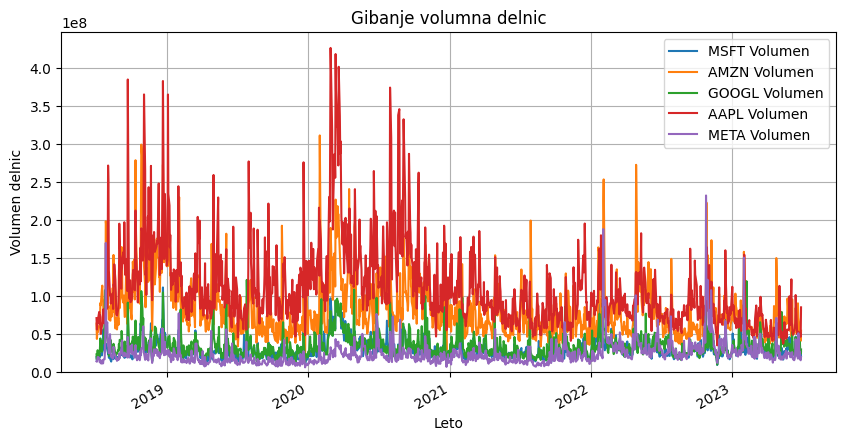

In [76]:
from analiza import graf_volumna
graf_volumna(podatki_o_delnicah)

Takoj vidimo, da je delnica podjetja Apple Inc. skozi zadnjih 5 let vseskozi razen v parih vmesnih obdobjih najbolj izmenjana delnica. Opazimo pa tudi, da je delnica podjetja Facebook Inc. oz. kasneje preimenovano v Meta Inc. najmanj izmenjana na dnevni bazi. 

S podatki o volumnu ter povprečnih cen smo izračunali vrednost izmenjanih delnic na trgovalni dan. Te podatki nam dajo občutek o vrednostih podjetij, katerih delnice analiziramo. Na spodnjem grafu ponazorim gibanje vrednosti podjetji skozi opazovano obdobje.

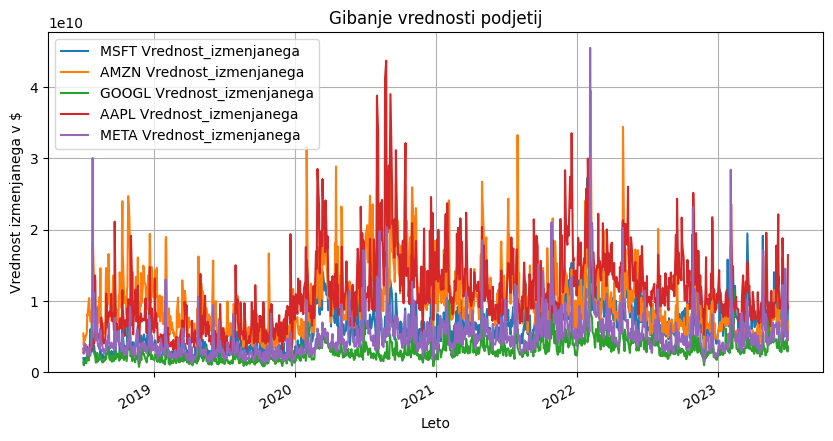

In [77]:
from analiza import graf_vrednost
graf_vrednost(podatki_o_delnicah)

Na zgornjem grafu je zanimivo to, da čeprav je delnica podjetja Meta Inc. najmanj izmenjana, je še vseeno vrednost podjetja Meta Inc. večino opazovanega obdobja nad vrednostjo podjetja Google Inc. Podjetje Apple Inc. ostaja na prvem mestu.

## TRENDI IN VOLATILNOST DELNIC                                                                                                                                     


### VOLATILNOST:
Investitorji se med seboj razlikujejo, nekateri so bolj, nekateri so manj nagnjeni k tveganju. Volatilnost delnice podjetja težko ocenimo iz kateregakoli od zgornjih grafov. Načeloma investitorji niso nagnjeni k tveganju, tako da je v našem interesu poiskati način, kako iz zgodovinskih podatkov določiti oz. razlikovati med volatilnostmi delnic. Zgoraj smo za vsako podjetje v tabelo z zgodovinskimi podatki dodali stolpec "Dnevni_donos". Večkrat kot je dnevni donos "velik" po absolutni vrednosti, bolj volatilna je delnica, saj se je njena cena bolj zvišala/znižala. Uporabili bomo podatke iz opazovanega obdobja in s transparentnimi histogrami prikazali, kako so za vsako izmed opazovanih delnic porazdeljeni dnevni donosi.

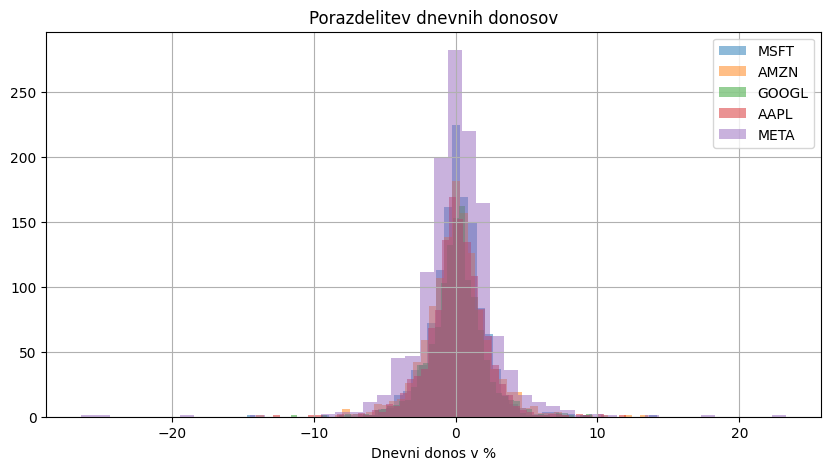

In [78]:
from analiza import graf_volatilnost
graf_volatilnost(podatki_o_delnicah)

Širši kot je histogram, bolj volatilna je delnica podjetja. Širina histograma je povezana s standardnim odklonom porazdelitve dnevnih donosov. Spomnimo se, da je standardni odklon koren od variance. Iz zgornjega prikaza se nam zdi razvidno, da je delnica podjetja Meta Inc. najbolj volatilna, saj ima najširši histogram. To lahko preverimo tudi z računom, kjer izračunamo standardne odklone dnevnih donosov delnic in zgornjo opazko potrdimo.

In [79]:
from analiza import dnevna_volatilnost
dnevna_volatilnost(podatki_o_delnicah)

Dnevna volatilnost:
MSFT:  1.97 %
AMZN:  2.30 %
GOOGL:  2.01 %
AAPL:  2.10 %
META:  2.83 %


Kot vidimo iz zgornjih grafov gibanj cen delnic, se cene delnic spreminjajo hitro in to posledično pomeni "zobčast" in rahlo nepregleden graf. Za opazovanje in prepoznavanje trendov dodamo stolpec v tabele v katerih se nahaja drseče povprečje (npr. 50 dnevno) za prilagojen zaključni tečaj in na grafu prikažemo trende gibanja cen.

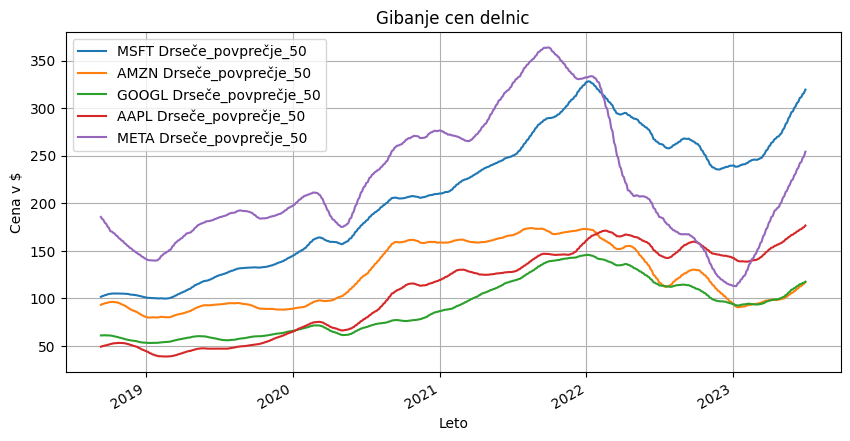

In [80]:
from ureditev import drsece_povprecje
podatki_o_delnicah = drsece_povprecje(podatki_o_delnicah, 50)

from analiza import graf_cene
graf_cene(podatki_o_delnicah, "Drseče_povprečje_50")


Potrdimo zgoraj napisano tezo o tem, da delnica podjetja Meta Inc. odstopa po trendu od ostalih podjetji, saj je iz zgornjega grafikona jasno razvidno, da se cena skozi vseh 5 let giblje po drugačnem trendu kot ostale, najbolj pa odstopa od začetka leta 2021 naprej.

## INVESTIRANJE IN STRATEGIJE:                                                                                                                                      
Recimo, da smo na začetku opazovanega obdobja sprejeli odločitev, da investiramo v opazovanih 5 delnic. Kaj je boljša investicijska odločitev, da X dolarjev investiramo v začetku in izplačamo na koncu ali, da Y dolarjev razdelimo na več investicij skozi opazovano obdobje, in se s tem mogoče izognemo npr. scenariju, kjer delnica takoj po našem vstopu doživi močan padec itd.? Kumulativni donos izračunamo rekurzivno in sicer s funkcijo cumprod() iz knjižnice pandas. Najprej izračunamo za vsako delnico kumulativni donos za opazovano obdobje izraženo v odstotkih: 

In [81]:
from analiza import izracunaj_donos
izracunaj_donos(podatki_o_delnicah)

Kumulativni donos: 
MSFT: 260.02%
AMZN: 52.13%
GOOGL: 109.61%
AAPL: 333.73%
META: 45.41%


Vidimo 333 odstotno rast delnice AAPL, medtem ko bi najslabši dobiček realizirali, če bi investirali v delnico META, komaj dobrih 45 odstotkov. Pa vendar s samo končnim kumulativnim donosom ne zvemo dosti. Prikažimo kako se spreminjajo donosi skozi opazovano obdobje.

In [82]:
from analiza import interaktivni_kumulativni
interaktivni_kumulativni(podatki_o_delnicah)

Poglejmo si sedaj še drugo omenjeno strategijo investiranja, in sicer, da vlagamo oz. kupujemo delnice večkrat skozi opazovano obdobje. Zanimal nas bo naš vložek oz. koliko delnic posameznega podjetja smo skozi čas kupili, koliko smo za to porabili in koliko smo v izgubi/profitu, če delnice nakoncu prodamo po ceni na trgu. Recimo, da je trgovalnih dni v mesecu 21, zaokrožimo to na 20 in rečemo, da vsak 20. dan kupimo eno delnico vsakega podjetja. Za nakupne cene bomo upoštevali povprečne cene, ki smo jih zračunali zgoraj, prav tako pa bomo nakoncu delnice prodali po povprečni ceni za zadnji trgovalni dan v opazovanem obdobju. Na koncu profit/izgubo prikažem še z grafom, s tortnim diagramom pa prikažem vrednost portfelja, če delnic na zadnji trgovalni dan opazovalnega obdobja ne bi prodali.

Končni izid strategije:
 
Delnice  MSFT  v lasti:  63
Denar investiran v delnico  MSFT:  13295.01 $.
Zaslužek:  8159.01$
 
 
Delnice  AMZN  v lasti:  63
Denar investiran v delnico  AMZN:  7695.13 $.
Zaslužek:  517.55$
 
 
Delnice  GOOGL  v lasti:  63
Denar investiran v delnico  GOOGL:  5670.86 $.
Zaslužek:  1870.24$
 
 
Delnice  AAPL  v lasti:  63
Denar investiran v delnico  AAPL:  6838.22 $.
Zaslužek:  5381.89$
 
 
Delnice  META  v lasti:  63
Denar investiran v delnico  META:  13781.37 $.
Zaslužek:  4298.37$
 


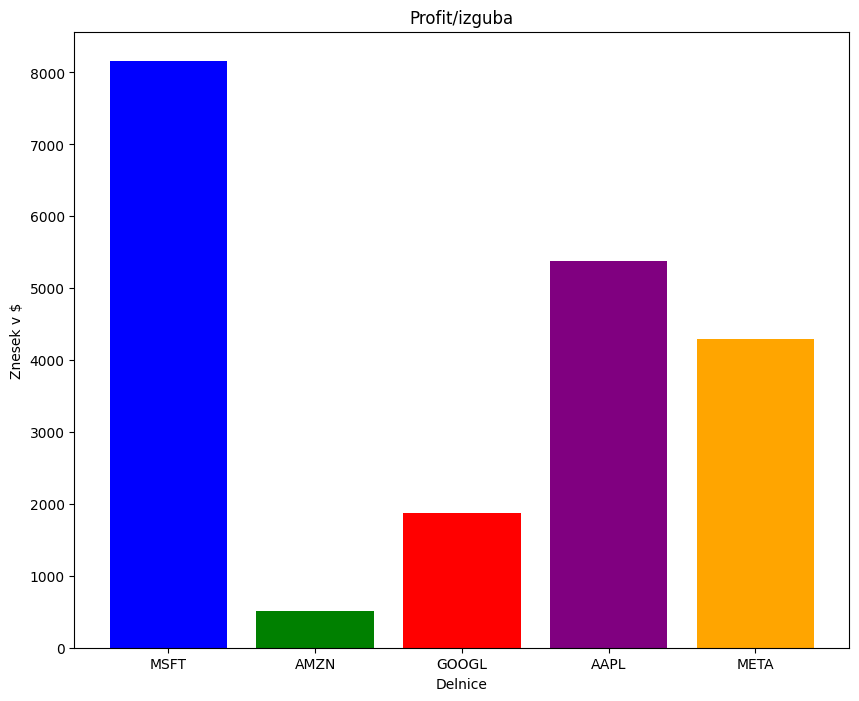

In [83]:
from analiza import izracun_roi
izracun_roi(podatki_o_delnicah, 20)

Vrednost portfelja: 65389.59$


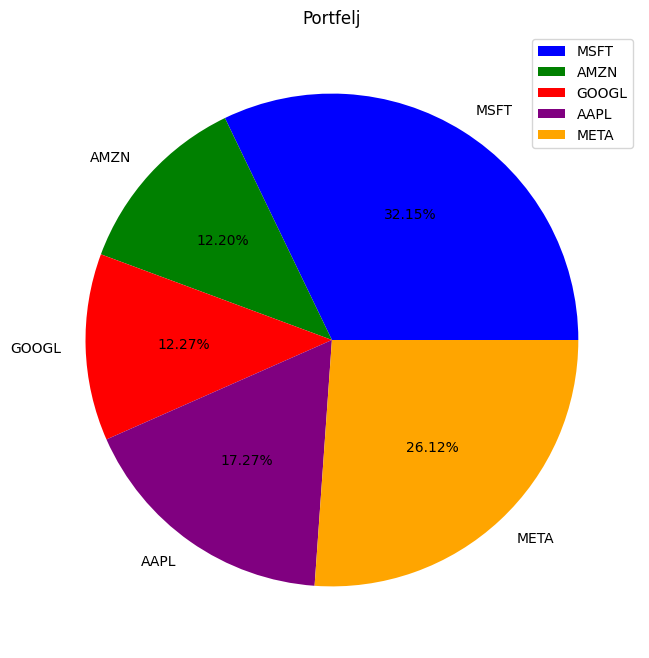

In [84]:
from analiza import izracun_roi_portfelj
izracun_roi_portfelj(podatki_o_delnicah)

Obe strategiji bi nam v opazovanem obdobju prinesli profit in ne izgube, ampak vseeno je prva strategija, kjer bi ves denar investirali na začetku bolj dobičkonosna kot druga, čeprav se zdi enostavnejša in manj premišljena. Potrebno pa je poudariti, da je to lahko slučaj izbranih podatkov, in bi, v katerem drugem scenariju veljalo obratno. 